# Linear models
Following _Introduction to Machine Learning with Python_ Section 2.3.3 Linear Models (p.47)

Linear models take a **linear** combination of features to predict the target. If the target is a continuous variable, we use _regression_, e.g. `LinearRegression()` in Scikit-learn. If the target is categorical (binary, or multivalued), we use _classification_, e.g. `LogisticRegression()` in Scikit-learn.

Linear models are often a good baseline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore') #ignoring some deprication warnings

## Linear models for regression

For a one dimensional problem, we have a single feature column `x` and linear regression represents a line:

$\hat{y}[i] = w[0]\cdot x[i][0] + b$

we have a single coefficient $w$ and intercept $b$ that minimize the mean-squared error. The cost function to minimize is:

$f(w, b) = \frac{1}{N}\sum_i \left(y[i] - (w[0]\cdot x[i][0] + b)\right)^2$

where $N$ is the number of samples `n_samples` - the number of rows in our feature matrix.

In [3]:
import mglearn

w[0]: 0.393906  b: -0.031804


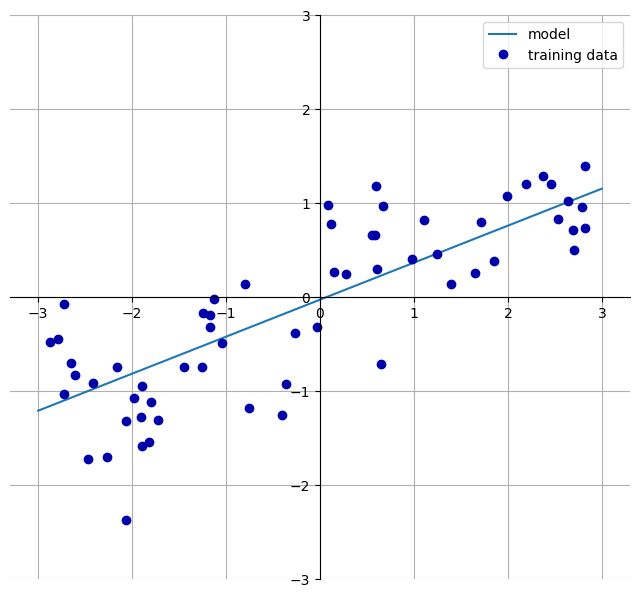

In [4]:
mglearn.plots.plot_linear_regression_wave()

In **linear** regression, the target values get approximated with a **linear** segment, a line (plane or hyperplane), such that the mean-squared error is minimized.

## Ordinary least squares 

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [6]:
print("lr.coef_: ", lr.coef_)
print("lr.intercept_: ", lr.intercept_)

lr.coef_:  [0.39390555]
lr.intercept_:  -0.031804343026759746


The model 'learned' the slope $w$ and intercept $b$ parameters. They are stored in `coef_` and `intercept_`, respectively.

Let's see if we are under- or overfitting. What should we look for?

In [7]:
print("Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("Validation score: {:.2f}".format(lr.score(X_val, y_val)))

Training score: 0.67
Validation score: 0.66


Training and validation scores are **similar**/different, we have high/**low** variance.  
Maximum score is 1.0 (it is $R^2$). Validation scores are close/**far** from maximum, we have **high**/low bias.  

We are over/**under** fitting.

### A dataset with more features - extended Boston housing dataset.  
Refer to section 2.3.1 Some Sample Datasets to learn more about the extended Boston housing dataset.

In [8]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)
print(y.shape)

(506, 104)
(506,)


In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

print("Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("Validation score: {:.2f}".format(lr.score(X_val, y_val)))

Training score: 0.95
Validation score: 0.61


Training and validation scores are similar/**different**, we have **high**/low variance.   

We are **over**/under fitting.  

To deal with high variance we need to make the model more/**less** complex. One way would be to choose a different model. Another is to use **regularization**.

## Ridge regression - minimize square of $l_2$ norm

In addition to minimizing mean-squared error, Ridge regression mimimizes the $l_2$ norm or the sum of squares of the model parameters/coefficients. The magnitudes of the $w$'s should be a small as possible.

The square of the $l_2$ norm of the $w$'s is defined as:
$\Vert w\Vert^2_2 = \sum w_i^2$

The cost function to minimize becomes:

$f(w, b) = \alpha\cdot \Vert w\Vert^2_2 + \frac{1}{N}\sum_i \left(y[i] - (w\cdot x[i] + b)\right)^2$


In [10]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Validation score: {:.2f}".format(ridge.score(X_val, y_val)))

Training score: 0.89
Validation score: 0.75


The model parameter `alpha` controls how much regularization is added. Default is `alpha=1.0`. **Higher** values of `alpha` result in **more** regularization. We expect training score to go down and variance to go down.

In [11]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Validation score: {:.2f}".format(ridge10.score(X_val, y_val)))

Training score: 0.79
Validation score: 0.64


**Lower** values of `alpha` result in **less** regularization. We expect training score to go up and variance to go up (a bit).

In [12]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Validation score: {:.2f}".format(ridge01.score(X_val, y_val)))

Training score: 0.93
Validation score: 0.77


We are interested in how the model *generalizes*, the validation score. We would pick `alpha=0.1` here.

The more we regularize using $l_2$, the smaller all coefficients get.

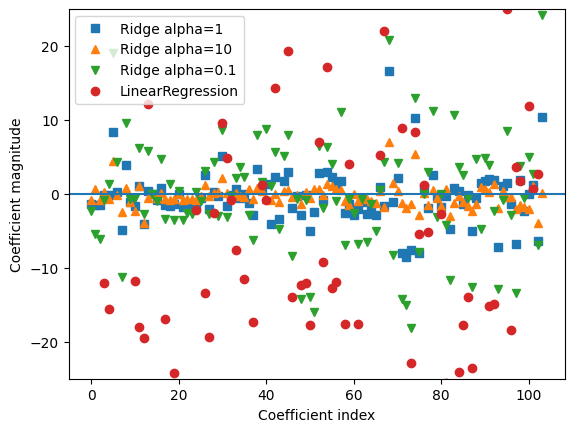

In [13]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

### Ridge regression learning curve 

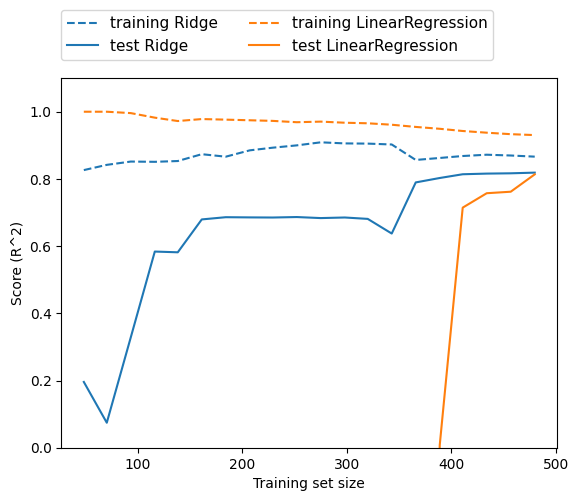

In [14]:
mglearn.plots.plot_ridge_n_samples()

Adding more data helps reducing overfitting. With more data regularization becomes less important.

## Lasso regression - minimize $l_1$ norm

Similar to ridge regression, lasso adds a regularization term. The $l_1$ norm is the sum of absolute values of the model parameters/coefficients, the $w$'s. By minimizing $l_1$ some $w$'s will be exactly zero.

The the $l_1$ norm of the $w$'s is defined as:
$\Vert w\Vert_1 = \sum \vert w_i\vert$

The cost function to minimize becomes:

$f(w, b) = \alpha\cdot \Vert w\Vert_1 + \frac{1}{N}\sum_i \left(y[i] - (w\cdot x[i] + b)\right)^2$



In [15]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Validation set score: {:.2f}".format(lasso.score(X_val, y_val)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Validation set score: 0.21
Number of features used: 4


Again, the model parameter `alpha` controls how much regularization is added. Default is `alpha=1.0`. 

Since we have **high**/low bias, our model is too **simple**/complex. We need more/**less** regularization.

**Higher** values of `alpha` result in **more** regularization.  
**Lower** values of `alpha` result in **less** regularization. 

Let's drop `alpha`.

In [16]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Validation set score: {:.2f}".format(lasso001.score(X_val, y_val)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Validation set score: 0.77
Number of features used: 33


In [17]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Validation set score: {:.2f}".format(lasso00001.score(X_val, y_val)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Validation set score: 0.64
Number of features used: 96


**Question:** Which `alpha` from the above would you choose and why?

**Answer:** We are interested in how well the model generalizes, highest validation score. We would choose `alpha=0.01`

The more we regularize using $l_1$, the more zero coefficients we get.

Text(0, 0.5, 'Coefficient magnitude')

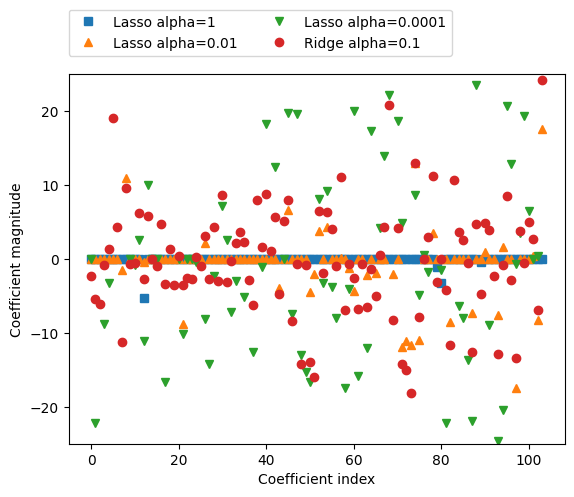

In [18]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

## ElasticNet - combining $l_1$ and $l_2$ regularization 

Try out ElasticNet

In [19]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet().fit(X_train, y_train)
print("Training set score: {:.2f}".format(enet.score(X_train, y_train)))
print("Validation set score: {:.2f}".format(enet.score(X_val, y_val)))
print("Number of features used:", np.sum(enet.coef_ != 0))

Training set score: 0.33
Validation set score: 0.22
Number of features used: 38


There are two hyperparameters now: `alpha=1.0` and `l1_ratio=0.5`. The latter says, $l_1$ and $l_2$ have equal weight.

Let's drop `alpha`:

In [20]:
enet = ElasticNet(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(enet.score(X_train, y_train)))
print("Validation set score: {:.2f}".format(enet.score(X_val, y_val)))
print("Number of features used:", np.sum(enet.coef_ != 0))

Training set score: 0.86
Validation set score: 0.72
Number of features used: 84


More $l_1$:

In [21]:
enet = ElasticNet(alpha=0.01, l1_ratio=0.8, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(enet.score(X_train, y_train)))
print("Validation set score: {:.2f}".format(enet.score(X_val, y_val)))
print("Number of features used:", np.sum(enet.coef_ != 0))

Training set score: 0.88
Validation set score: 0.74
Number of features used: 63


More $l_2$:

In [22]:
enet = ElasticNet(alpha=0.01, l1_ratio=0.3, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(enet.score(X_train, y_train)))
print("Validation set score: {:.2f}".format(enet.score(X_val, y_val)))
print("Number of features used:", np.sum(enet.coef_ != 0))

Training set score: 0.85
Validation set score: 0.71
Number of features used: 88


A little bit less regularization.

In [23]:
enet = ElasticNet(alpha=0.001, l1_ratio=0.8, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(enet.score(X_train, y_train)))
print("Validation set score: {:.2f}".format(enet.score(X_val, y_val)))
print("Number of features used:", np.sum(enet.coef_ != 0))

Training set score: 0.93
Validation set score: 0.78
Number of features used: 82
